In [1]:
#Importamos librerias
import pandas as pd
from pandas import read_csv

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
url='https://www.openml.org/data/get_csv/61/dataset_61_iris.arff'
#La siguient elinea no es necesaria usando esa fuente, pues ya
#Incuye la cabecera
#names=['sepallength','sepalwidth','petallength','petalwidht','class']
#dataset=read_csv(url,names=names)
dataset=read_csv(url)
#Mostramos la 'formal', deberia haber 150 entradas con 5 atributos
#cada una
print(dataset.shape)

(150, 5)


In [3]:
#Mostramos las tres primeras entradas
print(dataset.head(3)) 

   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa


In [4]:
#Mostramos un resumen estadistico de los datos
print(dataset.describe())

       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [5]:
#Distribucion por clases
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


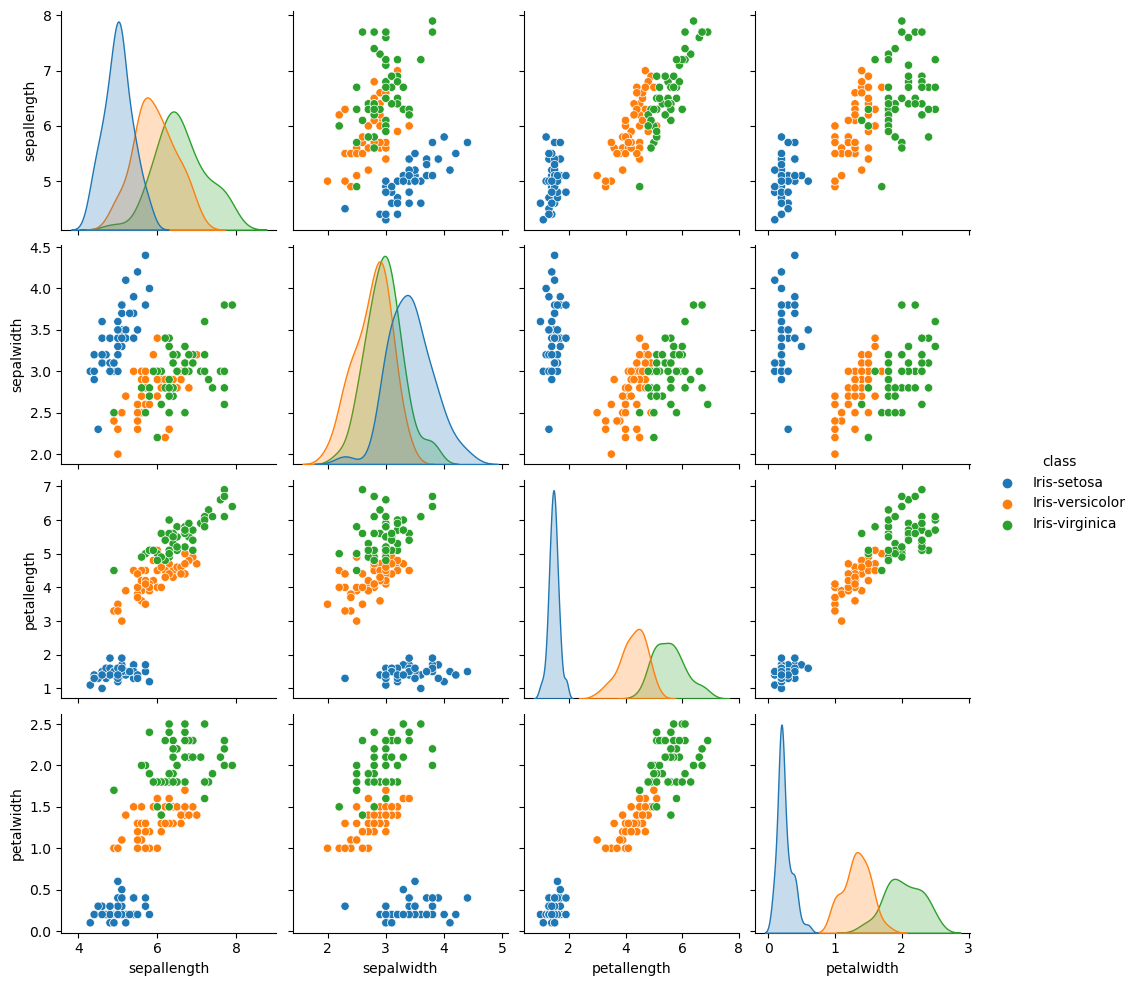

In [6]:
sns.pairplot(data=dataset,vars=('sepallength','sepalwidth','petallength','petalwidth'),hue='class')
plt.show()

In [7]:
#Iniciamos la semilla para generar numeros aleatorios estaticos
#np.random.seed(0)

In [8]:
#Dividimos el dataset en 80% de datos para entrenar y un 20% para testear
array=dataset.values
X=array[:,0:4]
y=array[:,4]

In [9]:
#Dividir la matriz en subconjuntos aleatorios de datos de prueba y entrenamiento.
X_train, X_validation , Y_train, Y_validation= train_test_split(X,y,test_size=0.20,random_state=1, shuffle=True)

In [10]:
# Cargamos los algoritmos
models=[]
models.append(("RF", RandomForestClassifier(n_jobs=2, random_state=0)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma='auto')))
models.append(("MLP", MLPClassifier(activation="relu", alpha=1e-05, batch_size="auto",beta_1=0.9
                                    , beta_2=0.999, early_stopping=False, epsilon=1e-08, 
                                    hidden_layer_sizes=(3,3) , learning_rate="constant", 
                                    learning_rate_init=0.001, max_iter=200, momentum=0.9 , 
                                    nesterovs_momentum=True, power_t=0.5 , random_state=1 ,
                                    shuffle=True, solver="lbfgs", tol=0.0001 , validation_fraction=0.1
                                    ,verbose=False, warm_start=False)))

In [11]:
#Evaluando cada modelo por turno
names=[]
results=[]
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


RF: 0.950000 (0.040825)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


C:\Users\PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

MLP: 0.966667 (0.040825)


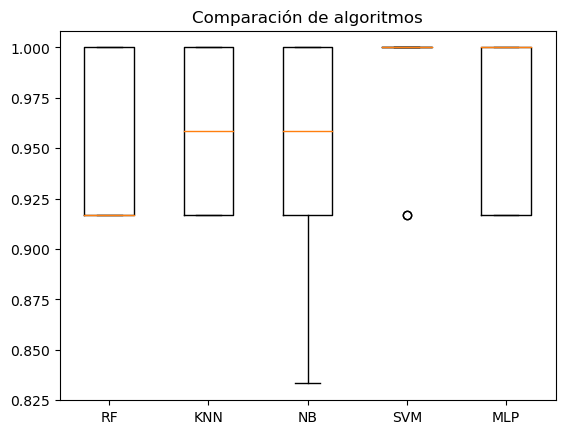

In [12]:
# Comparación de algoritmos
plt.boxplot(results, labels=names)
plt.title('Comparación de algoritmos')
plt.show()